In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# CSV 파일 경로
csv_path = "archive/NFLX.csv"

# CSV 파일 읽어오기 (첫 번째, 마지막 열 제외)
df = pd.read_csv(csv_path, usecols=range(0, 5))

# DataFrame 출력
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [3]:
# 2021년 이후 데이터 필터링
df_after_2021 = df[df["Date"] >= "2021-01-01"].copy()

# 출력하기
df_after_2021

,Date,Open,High,Low,Close
733,2021-01-04,539.000000,540.799988,515.090027,522.859985
734,2021-01-05,521.549988,526.780029,515.890015,520.799988
735,2021-01-06,511.970001,513.099976,499.500000,500.489990
736,2021-01-07,508.279999,516.440002,506.420013,508.890015
737,2021-01-08,511.309998,513.239990,504.510010,510.399994
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


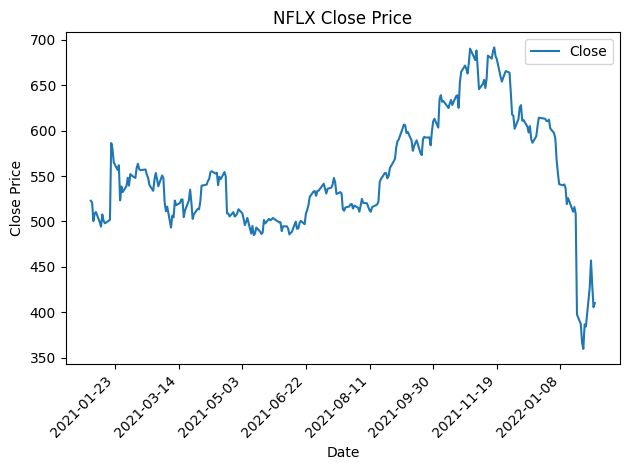

In [4]:
# 그래프 그리기
df_after_2021['Date'] = pd.to_datetime(df_after_2021['Date'], errors='coerce')
# 2. figure와 ax 먼저 생성
fig, ax = plt.subplots()

# 3. ax로 그래프 그리기
ax.plot(df_after_2021['Date'], df_after_2021['Close'], label='Close')

# 4. x축 눈금 개수 제한
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=9))

# 5. 기타 설정
plt.xticks(rotation=45, ha='right')
ax.set_title('NFLX Close Price')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend()

plt.tight_layout()
plt.show()

In [5]:
max_price = max(df_after_2021['Close'])
min_price = min(df_after_2021['Close'])

In [6]:
print("최고 종가: ", max_price)
print("최저 종가: ", min_price)

최고 종가:  691.690002
최저 종가:  359.700012


In [7]:
df_after_2021['YearMonth'] = df_after_2021['Date'].dt.to_period('M')


In [8]:
df_after_2021

,Date,Open,High,Low,Close,YearMonth
733,2021-01-04,539.000000,540.799988,515.090027,522.859985,2021-01
734,2021-01-05,521.549988,526.780029,515.890015,520.799988,2021-01
735,2021-01-06,511.970001,513.099976,499.500000,500.489990,2021-01
736,2021-01-07,508.279999,516.440002,506.420013,508.890015,2021-01
737,2021-01-08,511.309998,513.239990,504.510010,510.399994,2021-01
...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,2022-01
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,2022-02
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,2022-02
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,2022-02


In [9]:
df_after_group_2021 = df_after_2021.groupby('YearMonth', as_index=False).mean(numeric_only=True)

In [10]:
df_after_group_2021

,YearMonth,Open,High,Low,Close
0,2021-01,530.531051,537.838944,519.854214,526.816845
1,2021-02,547.777366,555.494205,540.621576,548.959999
2,2021-03,519.429134,527.057390,511.326090,518.123482
3,2021-04,532.810952,537.802858,527.041430,533.136662
4,2021-05,496.923996,502.062502,491.996503,496.714497
5,2021-06,503.470914,508.116364,498.675455,503.324091
6,2021-07,528.609045,534.298567,522.618091,528.653330
7,2021-08,529.884541,535.937267,526.222275,532.346817
8,2021-09,589.405233,598.170003,583.384760,590.795239
9,2021-10,639.220474,648.829043,632.430001,642.202849


In [11]:
df_after_group_2021['YearMonth']

0     2021-01
1     2021-02
2     2021-03
3     2021-04
4     2021-05
5     2021-06
6     2021-07
7     2021-08
8     2021-09
9     2021-10
10    2021-11
11    2021-12
12    2022-01
13    2022-02
Name: YearMonth, dtype: period[M]

In [12]:
df_after_group_2021['YearMonth'] = df_after_group_2021['YearMonth'].dt.to_timestamp()

In [13]:
df_after_group_2021['YearMonth']

0    2021-01-01
1    2021-02-01
2    2021-03-01
3    2021-04-01
4    2021-05-01
5    2021-06-01
6    2021-07-01
7    2021-08-01
8    2021-09-01
9    2021-10-01
10   2021-11-01
11   2021-12-01
12   2022-01-01
13   2022-02-01
Name: YearMonth, dtype: datetime64[ns]

In [14]:
df_after_group_2021

,YearMonth,Open,High,Low,Close
0,2021-01-01,530.531051,537.838944,519.854214,526.816845
1,2021-02-01,547.777366,555.494205,540.621576,548.959999
2,2021-03-01,519.429134,527.057390,511.326090,518.123482
3,2021-04-01,532.810952,537.802858,527.041430,533.136662
4,2021-05-01,496.923996,502.062502,491.996503,496.714497
5,2021-06-01,503.470914,508.116364,498.675455,503.324091
6,2021-07-01,528.609045,534.298567,522.618091,528.653330
7,2021-08-01,529.884541,535.937267,526.222275,532.346817
8,2021-09-01,589.405233,598.170003,583.384760,590.795239
9,2021-10-01,639.220474,648.829043,632.430001,642.202849


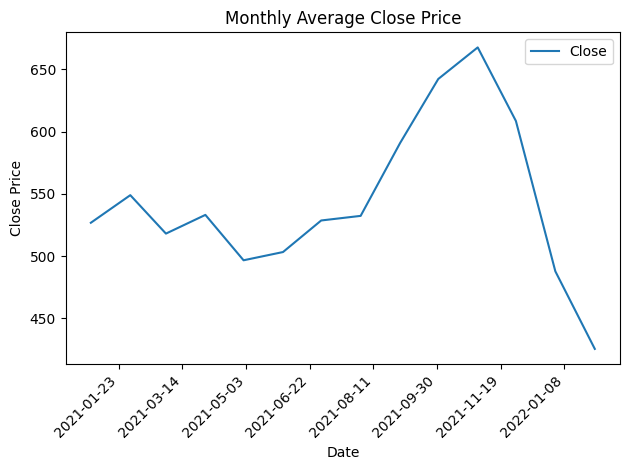

In [15]:
# 1. figure, ax 생성
fig, ax = plt.subplots()

# 2. plot (ax를 통해)
ax.plot(df_after_group_2021['YearMonth'], df_after_group_2021['Close'], label='Close')

# 3. x축 눈금 수 제한
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

# 4. 레이블 회전
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# 5. 제목, 레이블, 범례 설정
ax.set_title('Monthly Average Close Price')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend()

# 6. 여백 자동 조정 + 출력
plt.tight_layout()
plt.show()

In [16]:
# 2022년 이후 데이터 필터링
df_after_2022 = df[df["Date"] >= "2022-01-01"]

# 출력하기
df_after_2022

,Date,Open,High,Low,Close
985,2022-01-03,605.609985,609.989990,590.559998,597.369995
986,2022-01-04,599.909973,600.409973,581.599976,591.150024
987,2022-01-05,592.000000,592.840027,566.880005,567.520020
988,2022-01-06,554.340027,563.359985,542.010010,553.289978
989,2022-01-07,549.460022,553.429993,538.219971,541.059998
990,2022-01-10,538.489990,543.690002,526.320007,539.849976
991,2022-01-11,536.989990,543.909973,530.070007,540.840027
992,2022-01-12,544.270020,544.270020,532.020020,537.219971
993,2022-01-13,537.059998,540.789978,518.260010,519.200012
994,2022-01-14,517.599976,538.369995,511.880005,525.690002


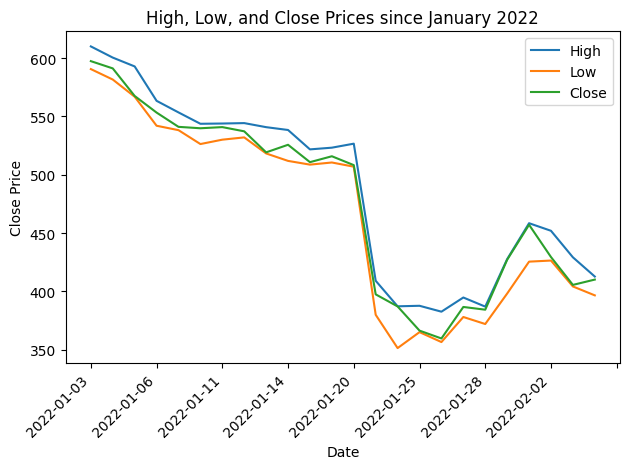

In [17]:
# 1) figure, ax 생성
fig, ax = plt.subplots()

# 2) ax 기반 plot
ax.plot(df_after_2022['Date'], df_after_2022['High'],  label='High')
ax.plot(df_after_2022['Date'], df_after_2022['Low'],   label='Low')
ax.plot(df_after_2022['Date'], df_after_2022['Close'], label='Close')

# 3) x축 눈금 개수 제한
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

# 4) x축 레이블 회전
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# 5) 제목, 축 레이블, 범례
ax.set_title('High, Low, and Close Prices since January 2022')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend()

# 6) 여백 정리 + 출력
plt.tight_layout()
plt.show()